In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from sklearn.decomposition import PCA
import tools
import importlib
import glob
import os

importlib.reload(tools)

<module 'tools' from '/home/eliska/evolution/code/tools.py'>

In [6]:
path = "tables"

# Collect all matching CSV files
files = glob.glob(os.path.join(path, "proportions3_*.csv"))

dfs = []

for f in files:
    # Extract country code from filename
    country = os.path.splitext(os.path.basename(f))[0].split("_")[1]
    
    # Read the CSV
    df = pd.read_csv(f)
    
    # Add the country column
    df["country"] = country
    
    dfs.append(df)

combined = pd.concat(dfs, ignore_index=True)
combined["year_mode"].values

,year_mode,1,2,3,4,5,6,7,8,country
0,"(1000, 1010]",0.169284,0.165794,0.000000,0.000000,0.000000,0.664921,0.000000,0.000000,nl
1,"(1440, 1450]",0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,nl
2,"(1580, 1590]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,nl
3,"(1590, 1600]",0.000000,0.000000,0.000000,0.000000,0.000000,0.559078,0.000000,0.440922,nl
4,"(1610, 1620]",0.000000,0.000000,0.000000,0.000000,0.000000,0.516949,0.021186,0.461864,nl
...,...,...,...,...,...,...,...,...,...,...
106,"(1980, 1990]",0.058879,0.029343,0.028104,0.235584,0.188253,0.119889,0.152446,0.187502,es
107,"(1990, 2000]",0.074547,0.048138,0.041885,0.214024,0.146099,0.117684,0.142515,0.215107,es
108,"(2000, 2010]",0.112031,0.062279,0.038427,0.244087,0.146140,0.061227,0.139586,0.196223,es
109,"(2010, 2020]",0.226087,0.066821,0.018812,0.117467,0.092721,0.029802,0.240246,0.208045,es


In [10]:
combined["year_mode"].dtype

dtype('O')

In [12]:
combined["year_start"] = combined["year_mode"].str.extract(r"(\d+)").astype(int)
filtered = combined[combined["year_start"] >= 1790]
filtered

,year_mode,1,2,3,4,5,6,7,8,country,year_start
20,"(1790, 1800]",0.000000,0.000000,0.033351,0.050829,0.047797,0.592474,0.054575,0.220974,nl,1790
21,"(1800, 1810]",0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,nl,1800
22,"(1810, 1820]",0.000000,0.000000,0.000000,0.000000,0.000000,0.715254,0.000000,0.284746,nl,1810
23,"(1820, 1830]",0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,nl,1820
24,"(1830, 1840]",0.000000,0.000000,0.000000,0.000000,0.000000,0.291785,0.000000,0.708215,nl,1830
...,...,...,...,...,...,...,...,...,...,...,...
106,"(1980, 1990]",0.058879,0.029343,0.028104,0.235584,0.188253,0.119889,0.152446,0.187502,es,1980
107,"(1990, 2000]",0.074547,0.048138,0.041885,0.214024,0.146099,0.117684,0.142515,0.215107,es,1990
108,"(2000, 2010]",0.112031,0.062279,0.038427,0.244087,0.146140,0.061227,0.139586,0.196223,es,2000
109,"(2010, 2020]",0.226087,0.066821,0.018812,0.117467,0.092721,0.029802,0.240246,0.208045,es,2010


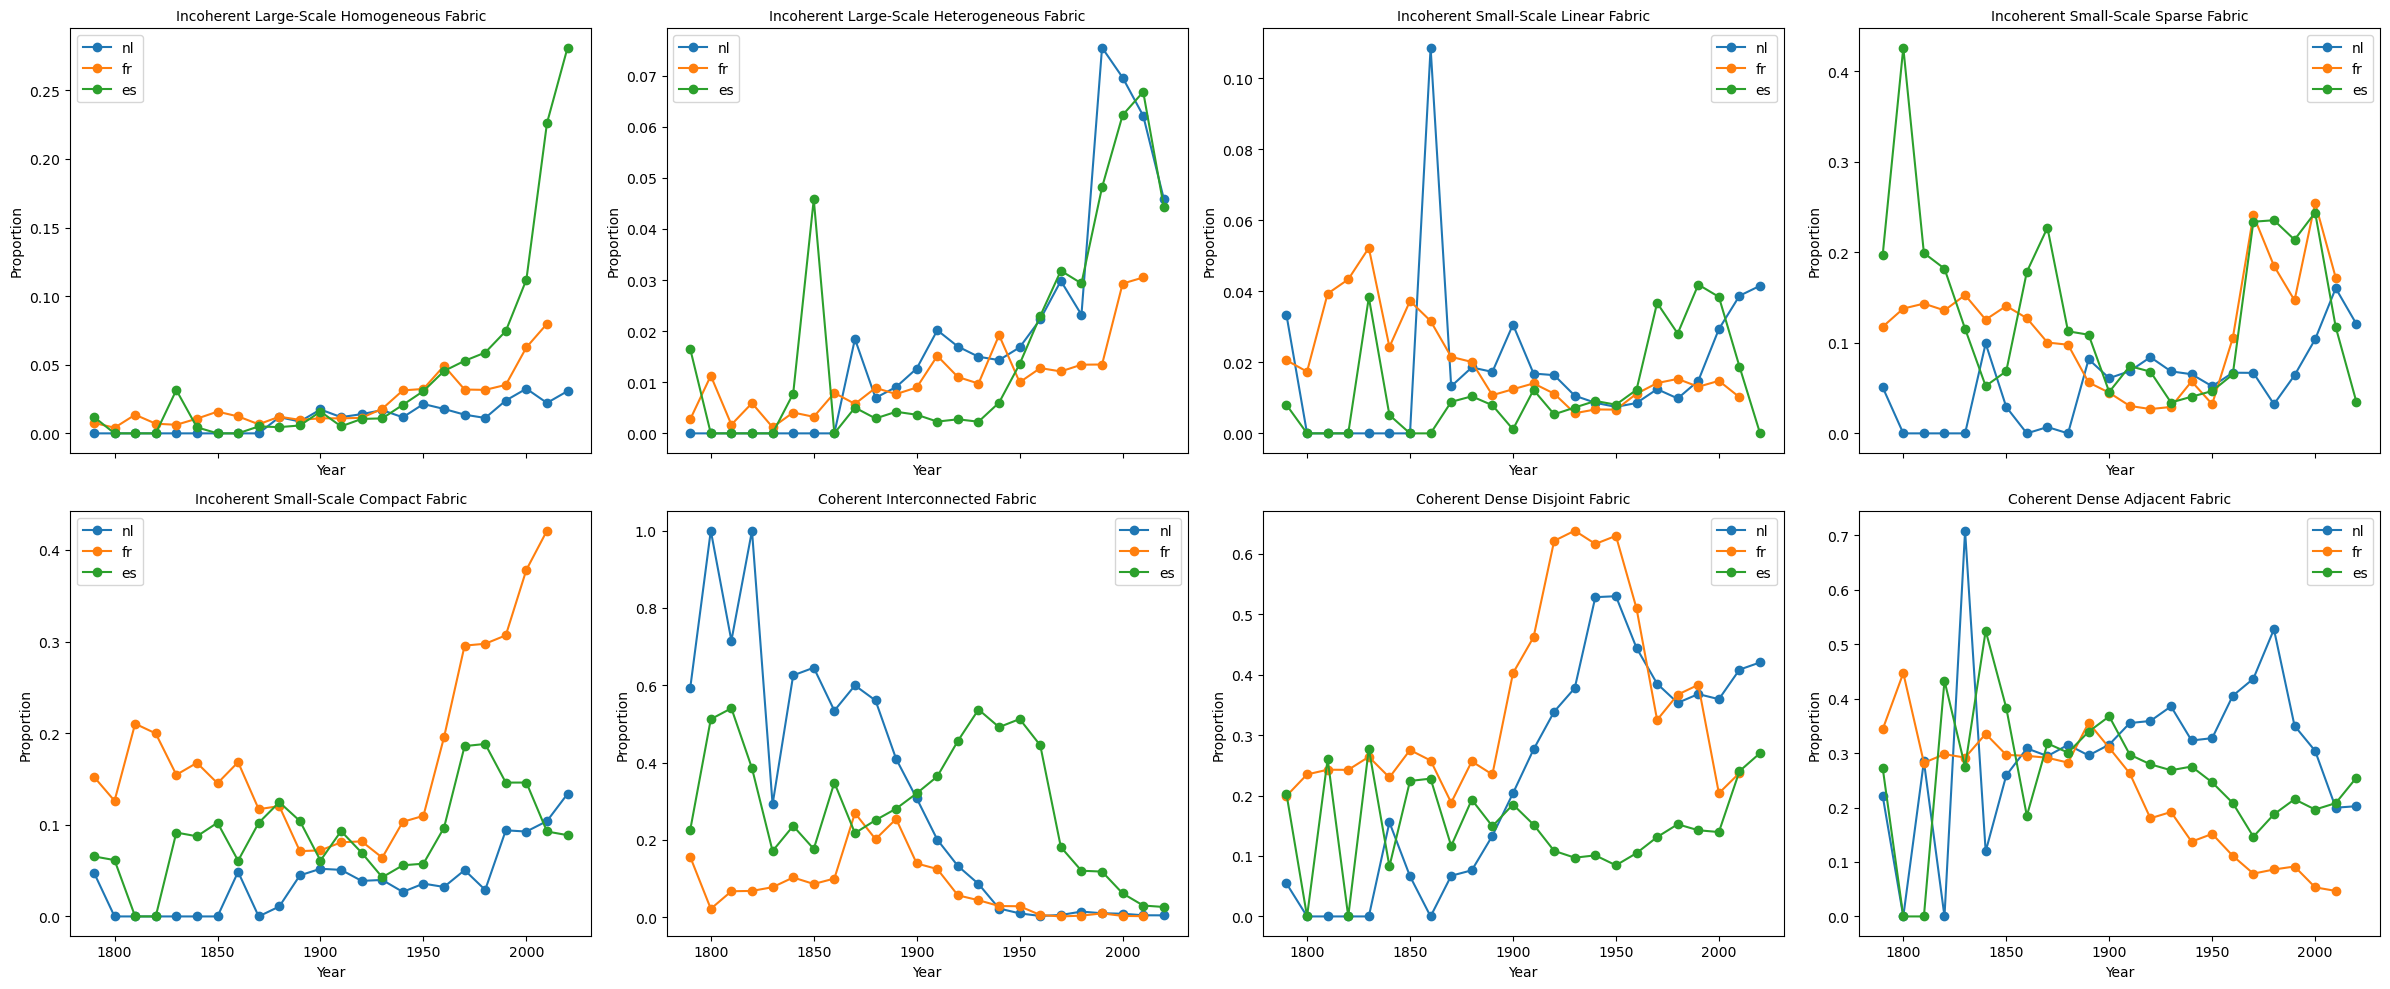

In [15]:
type_names = {
    "1": "Incoherent Large-Scale Homogeneous Fabric",
    "2": "Incoherent Large-Scale Heterogeneous Fabric",
    "3": "Incoherent Small-Scale Linear Fabric",
    "4": "Incoherent Small-Scale Sparse Fabric",
    "5": "Incoherent Small-Scale Compact Fabric",
    "6": "Coherent Interconnected Fabric",
    "7": "Coherent Dense Disjoint Fabric",
    "8": "Coherent Dense Adjacent Fabric"
}

# Columns representing types
types = [str(i) for i in range(1, 9)]

# Get unique countries
countries = filtered["country"].unique()

# Create subplots: 2 rows x 4 columns
fig, axes = plt.subplots(2, 4, figsize=(24, 10), sharex=True, sharey=False)
axes = axes.flatten()  # flatten to easily loop

for i, t in enumerate(types):
    ax = axes[i]
    
    # Plot each country
    for country in countries:
        country_data = filtered[filtered["country"] == country]
        ax.plot(
            country_data["year_start"],  # x-axis
            country_data[t],             # y-axis
            marker='o',
            label=country
        )
    
    # Set descriptive title
    ax.set_title(type_names[t], fontsize=10)
    ax.set_xlabel("Year")
    ax.set_ylabel("Proportion")
    ax.legend()

plt.tight_layout()